<br><br>

## 계절성 시계열 데이터에 대한 분석 : SARIMA

SARIMA : 데이터가 지닌 계절성(주기에 따라 유사한 양상으로 변화하는 모양)까지 고려한 ARIMA 모델


### 데이터 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/arima_data.csv', names = ['day', 'price'])
data['day'] = pd.to_datetime(data['day'],format="%Y-%m-%d")
data.set_index('day', inplace=True)
s_data = data


In [2]:
s_data

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298
2013-06-01,6739
2013-07-01,7107
2013-08-01,6492
2013-09-01,5693


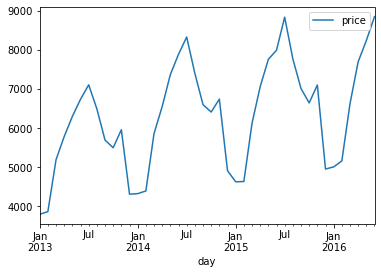

In [3]:
train_len = int(len(s_data) * 0.7)
training = s_data[:train_len]
test = s_data.drop(training.index)


import matplotlib.pyplot as plt
training.plot()
plt.show()

> SARIMAX(endog, order=(1,1,1), seasonal_order=(1,1,1,12),<br>
&emsp; &emsp; &emsp; &emsp; enforce_stationarity=False, enforce_invertibility=False)

* endog : 시계열 y값<br>
* order ((p,d,q), optional) : 각각 AR, diff, and MA 값
* seasonal_order ((P,D,Q,s), optional) : s는 계절의 기간 수를 제공하는 정수
* trend (str{'n','c','t','ct'}, optional) : 'n'은 없음,  'c'는 상수, 't'는 선형 추세, 'ct'는 둘 다

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX


model = SARIMAX(training.price.values, 
                  order=(2,1,2), seasonal_order=(1,1,1,12),
                  trend='ct',
                  enforce_stationarity=False, 
                  enforce_invertibility=False)

results = model.fit()
results.summary()

C:\Users\jjang\anaconda3\envs\ADP_Class\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   42
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                 -90.141
Date:                              Fri, 10 Dec 2021   AIC                            198.281
Time:                                      06:17:22   BIC                            204.033
Sample:                                           0   HQIC                           197.749
                                               - 42                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -266.3161   2243.254     -0.119      0.905   -4663.012    4130.380
drift          8.4685     52.534      0.161      0.872     -94.497     111.434
ar.L1         -0.8374      1.085     -0.772      0.440      -2.963       1.289
ar.L2          0.0155      1.292      0.012      0.990      -2.517       2.548
ma.L1         -0.0080     10.396     -0.001      0.999     -20.383      20.367
ma.L2         -0.9240      9.773     -0.095      0.925     -20.079      18.230
ar.S.L12       0.0233      5.074      0.005      0.996      -9.922       9.969
ma.S.L12      -0.2263      7.163     -0.032      0.975     -14.266      13.813
sigma2      2.922e+04   2.56e+05      0.114      0.909   -4.73e+05    5.31e+05
===================================================================================
Ljung-Box (Q):                       11.04   Jarque-Bera (JB):                 1.16
Prob(Q):                              0.61   Prob(JB):                         0.56
Heteroskedasticity (H):               0.90   Skew:                            -0.62
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<br>

### 데이터 확인

1. 시간 경과에 따른 표준화 잔차
2. 히스토그램과 표준화 된 잔차의 추정 된 밀도, 참조를 위해 그려진 Normal (0,1) 밀도.
3. 일반 기준선이있는 일반 QQ 플롯.
4. 상관도

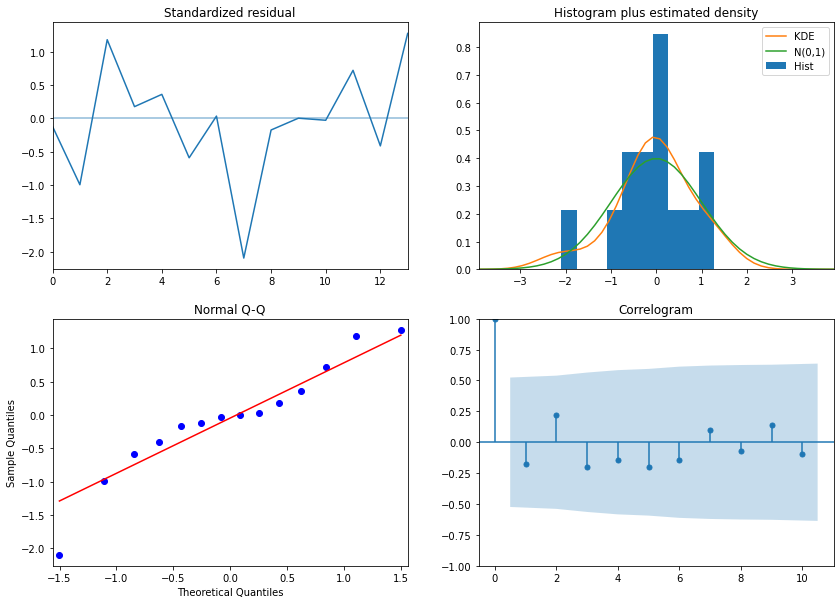

In [9]:
results.plot_diagnostics(figsize=(14, 10))
plt.show()

<br>

### 예측값, mse, 신뢰구간의 최소&최댓값

In [10]:
forecast_values = results.get_forecast(steps=len(test))

forecast_values.summary_frame()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,9483.491029,173.846798,9142.757566,9824.224492
1,8463.395254,175.597424,8119.230628,8807.559880
2,7791.121131,175.576941,7446.996650,8135.245611
3,7493.318393,176.426971,7147.527883,7839.108902
4,8028.405739,176.372152,7682.722673,8374.088806
5,6004.383133,176.973328,5657.521784,6351.244481
6,6105.994735,176.925506,5759.227114,6452.762355
7,6307.696500,177.433616,5959.933003,6655.459998
8,7885.017608,177.413575,7537.293390,8232.741826
9,9003.677387,177.727231,8655.338415,9352.016359


### 예측값을 그리는 함수

In [12]:
forecast_values

In [13]:
forecast_values.conf_int()

array([[ 9142.75756613,  9824.22449226],
       [ 8119.23062751,  8807.55988012],
       [ 7446.99665049,  8135.24561055],
       [ 7147.52788314,  7839.10890206],
       [ 7682.72267264,  8374.08880571],
       [ 5657.5217843 ,  6351.24448149],
       [ 5759.22711443,  6452.76235503],
       [ 5959.93300268,  6655.45999768],
       [ 7537.29339045,  8232.74182586],
       [ 8655.33841505,  9352.01635875],
       [ 9350.27399493, 10046.97419375],
       [ 9997.51891464, 10695.21143821],
       [10678.54945659, 11580.5427925 ],
       [ 9770.41092117, 10679.49338891],
       [ 9214.93384369, 10123.54567564],
       [ 9038.91075309,  9951.66820828],
       [ 9700.17124883, 10612.70231871],
       [ 7808.64148934,  8724.36997564]])

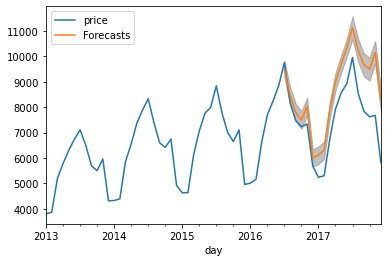

In [17]:
#pred_ci = forecast_values.conf_int()
ax = s_data.plot() ## 실제 값 

pred_ci = pd.DataFrame(forecast_values.conf_int())
pred_ci.index = list(test.index)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='gray', alpha=0.5)

predicted = pd.DataFrame(forecast_values.predicted_mean)
predicted.index = list(test.index)
predicted.columns = ['Forecasts']
predicted.plot(ax=ax, label="Forecasts")


plt.legend()
plt.show()

In [18]:
from sklearn.metrics import r2_score
r2_score(predicted, test)

0.2006815424790297